**Necessary imports**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Understanding data**

In [13]:
data = pd.read_csv('haberman.csv')
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [14]:
data.shape

(306, 4)

In [15]:
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [16]:
"""A manual inspection of data seems to give only two class labels. Either 1 or 2 but we would confirm"""

print(data['status'].unique())

[1 2]


In [17]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Before plotting, we also can find how many of the people treated survived and how many didn't

In [20]:
print ('count of people who survived and who didn\'t')
print (data['status'].value_counts())
print ('\nratio of people who survived and who didn\'t')
print (data['status'].value_counts(normalize = True))

count of people who survived and who didn't
1    225
2     81
Name: status, dtype: int64

ratio of people who survived and who didn't
1    0.735294
2    0.264706
Name: status, dtype: float64


****OBSERVATIONS****
- The dataset is complete with no null values
- The mean age is approx 52
- The nodes has most of the data in 75th percentile with an absurdly huge outlier of 52 nodes
- approximately 73% people survived after the treatment

**Plotting data and inferencing from it**

['age', 'year', 'nodes', 'status']


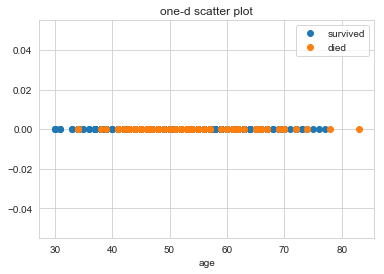

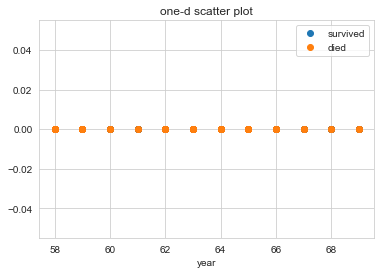

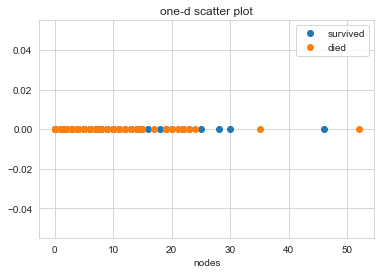

In [31]:
# 1 d scatter plot
index = 1
print (list(data.columns))
for feature in list(data.columns[:-1]):
    plt.figure(index)
    data_status1 = data.loc[data['status'] == 1]
    data_status2 = data.loc[data['status'] == 2]
    plt.plot(data_status1[feature],np.zeros_like(data_status1[feature]),'o',label = 'survived')
    plt.plot(data_status2[feature],np.zeros_like(data_status2[feature]),'o', label = 'died')
    plt.xlabel(feature)
    plt.legend()
    index += 1
    plt.title('one-d scatter plot')

**Observations**
- Nothing useful can be observed/inferenced from the data

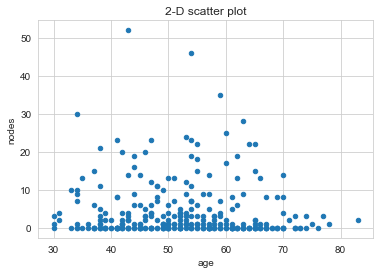

In [32]:
# 2d scatter plot
data.plot(kind = 'scatter', x = 'age', y = 'nodes')
plt.title('2-D scatter plot')
plt.show()

**Observations**: 
- The only thing observable from this plot is that when the number of nodes approach zero. the concetration/density increases.

**Bivariate Analysis(Pair Plots)**

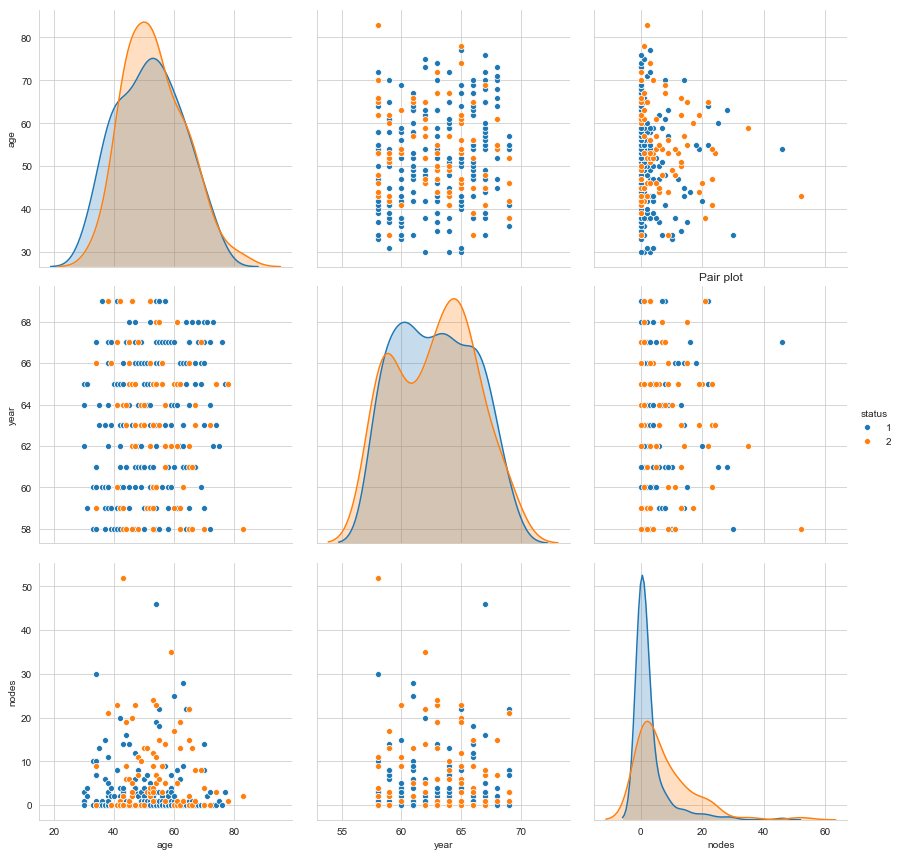

In [33]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(data, hue = 'status', vars = ['age','year','nodes'], height = 4)
plt.title('Pair plot')
plt.show()

**Observations**: 
- No correlation between age, year and number of nodes can be observed 

**Trying univariate analysis**

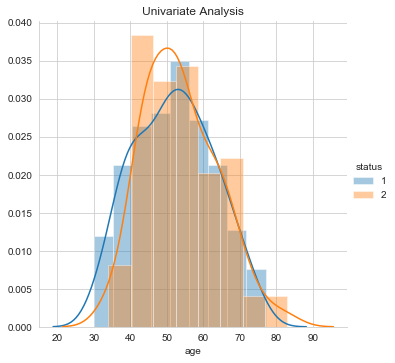

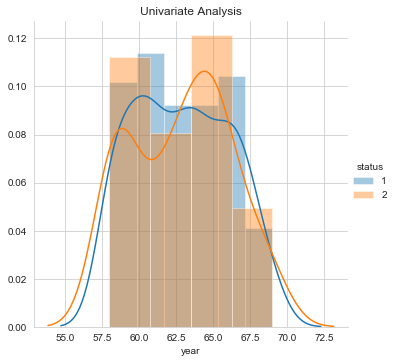

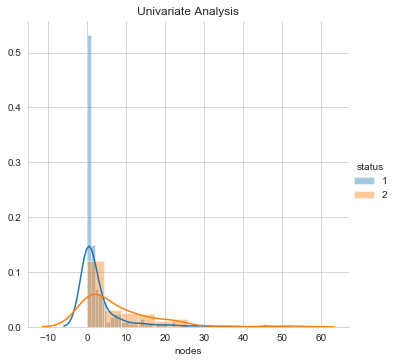

In [34]:
for feature in list(data.columns[:-1]):
    fig = sns.FacetGrid(data,hue='status',height = 5)
    fig.map(sns.distplot, feature).add_legend()
    plt.title('Univariate Analysis')
    plt.show()

{} 

 age
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
{} 

 year
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
{} 

 nodes
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


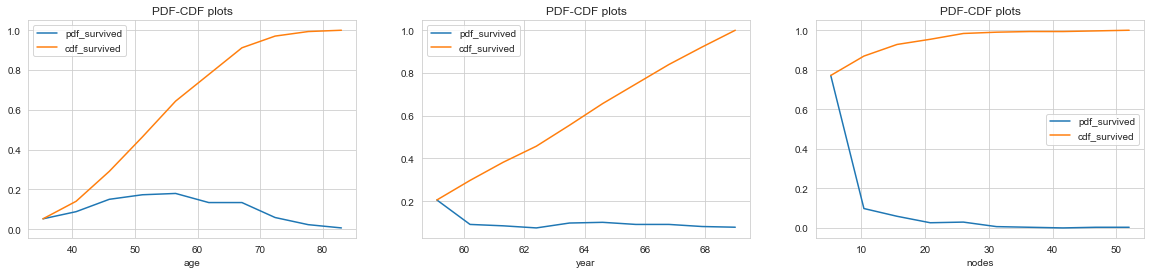

In [35]:
plt.figure(figsize=(20,4))
for idx,feature in enumerate(list(data.columns[:-1])):
    plt.subplot(1, 3, idx+1)
    print("{} \n\n",format(feature))
    counts, bin_edges = np.histogram(data[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.legend(['pdf_survived','cdf_survived'])
    plt.xlabel(feature)
    plt.title('PDF-CDF plots')

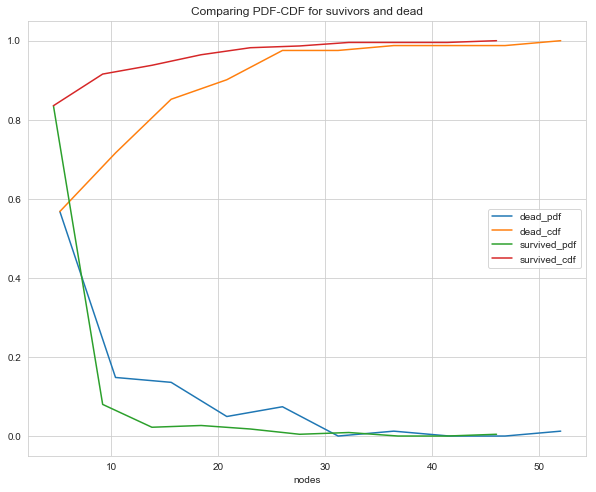

In [36]:
# The node count is a feature that has reasonably visible affects hence plotting the node count values
# and it's affect on survial status
plt.figure(figsize = (10,8))

data_died = data.loc[data['status'] == 2]
data_sur = data.loc[data['status'] == 1]

counts, bin_edges = np.histogram(data_died['nodes'],bins = 10, density = True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(data_sur['nodes'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['dead_pdf','dead_cdf','survived_pdf','survived_cdf'])
plt.xlabel('nodes')
plt.title('Comparing PDF-CDF for suvivors and dead')
plt.show()

**Observation**
- for now it can be observed that the number of nodes is a key factor in determining whether a patient lives or not.
- the probability that the patient with less than equal to 4 nodes survives is very high.

making box plots and violin plots for better visualization

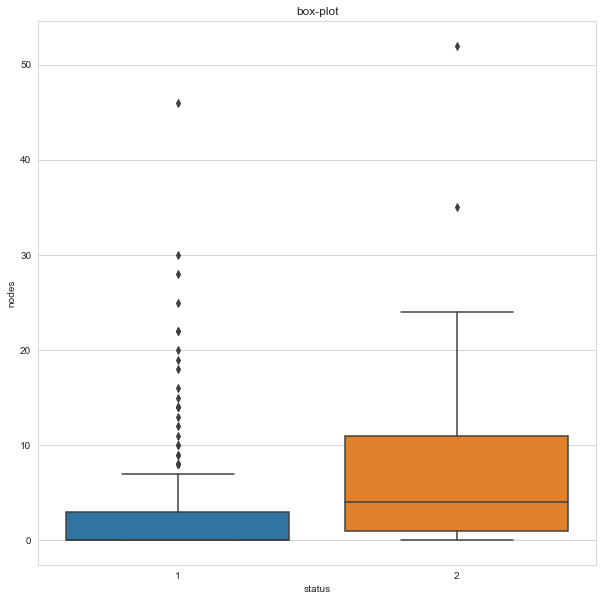

In [37]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'status',y = 'nodes',data = data)
plt.title('box-plot')
plt.show()

**Observations**
- The boxplot of status = 1 has 75th percentile value approx 2 and having the 25th and 50th percentlie oveerlaped
- for boxplot of 2, the 25th percentile is at 2, 50th at 3 and 75th at 11.4
- The whiskers for boxplot 2 is also very large because higher Inter quartile range.

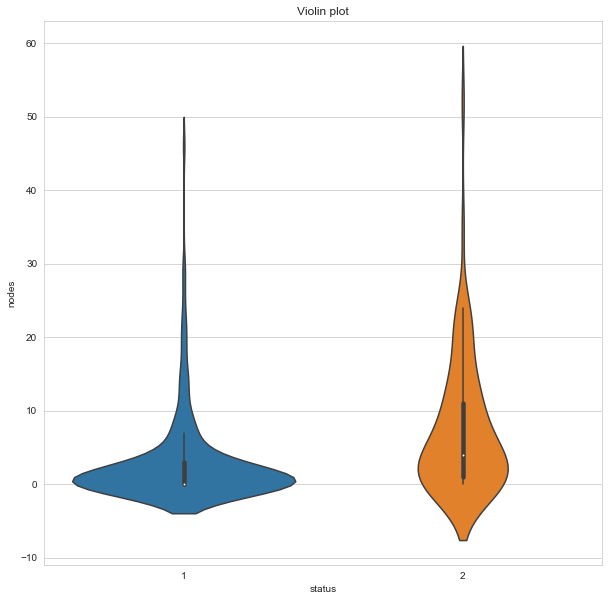

In [38]:
plt.figure(figsize = (10,10))
sns.violinplot(x = 'status',y = 'nodes',data = data)
plt.title('Violin plot')
plt.show()

**Observations**
- This is a better version of the box plot with the same observations as that of before.
- 75th percentile of patients who died have node count < 11
- 50 percentile of the same below 3 and 25 percentile below 2
- The violin plot for status = 1 shows dense nature of values corresponding to the number of nodes which can be observed from the distplot and the mean values.

<Figure size 720x720 with 0 Axes>

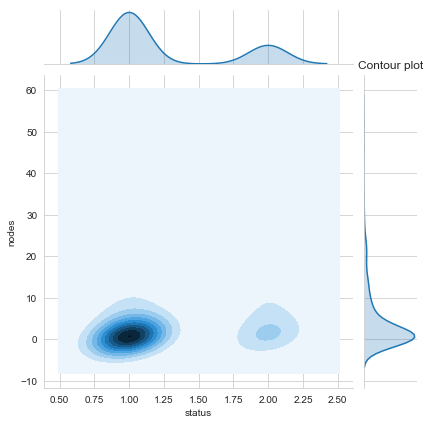

In [39]:
# I will plot the contour plot of the same to better observe the density!
plt.figure(figsize = (10,10))
sns.jointplot(x = 'status', y = 'nodes', data = data, kind = 'kde')
plt.title('Contour plot')
plt.show()

**Observations :**
- This contour plot confirms the greater density of the boxplot for status 1 corresponding to the number of nodes


**CONCLUSIONS**
- To make a model out of the given data just by observing the closeness of the data is not possible because a visible boundary/plane/any n-dimensional surface cannot be visualised from the plots.
- Number of nodes is an important feature and if number of nodes are less, the patient is likely to survive.
- We need to add additional features to better fit the data, features incorporating nodes and age can work(polynomial features)